In [262]:
from IPython.display import display
from matplotlib import pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import statistics
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
df = pd.read_csv('Offenses_NYC_2013.csv')
df.isnull().values.any() 

True

In [264]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


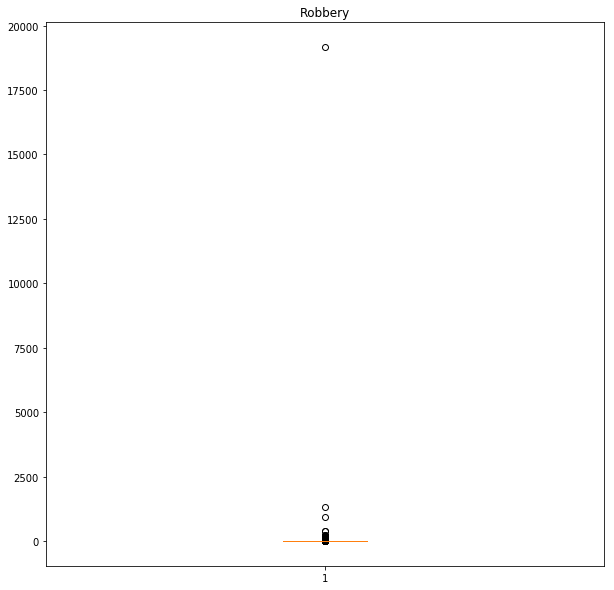

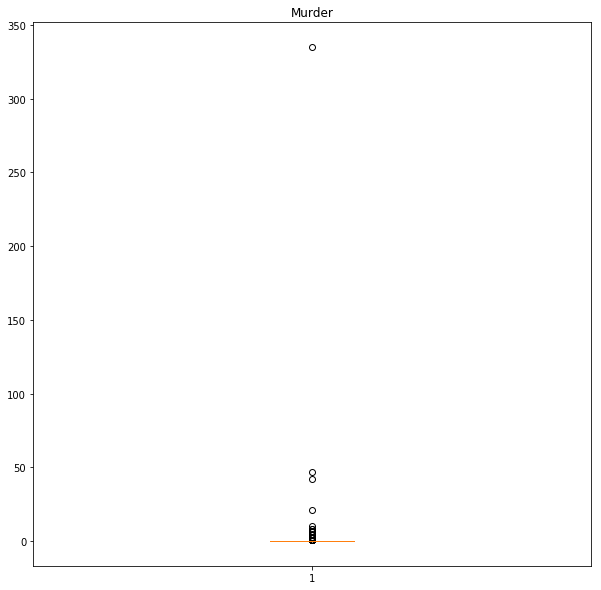

In [265]:
rob=df['Robbery']

plt.figure(figsize=(10, 10))
plt.boxplot(rob)
plt.title('Robbery')
plt.show()

murder=df['Murder and nonnegligent manslaughter']
plt.figure(figsize=(10, 10))
plt.boxplot(murder)
plt.title('Murder')
plt.show()

40037.63218390805


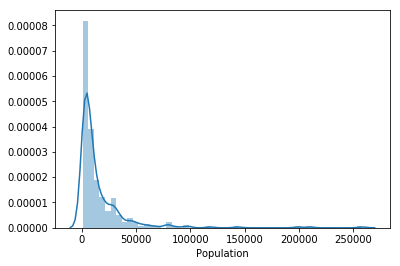

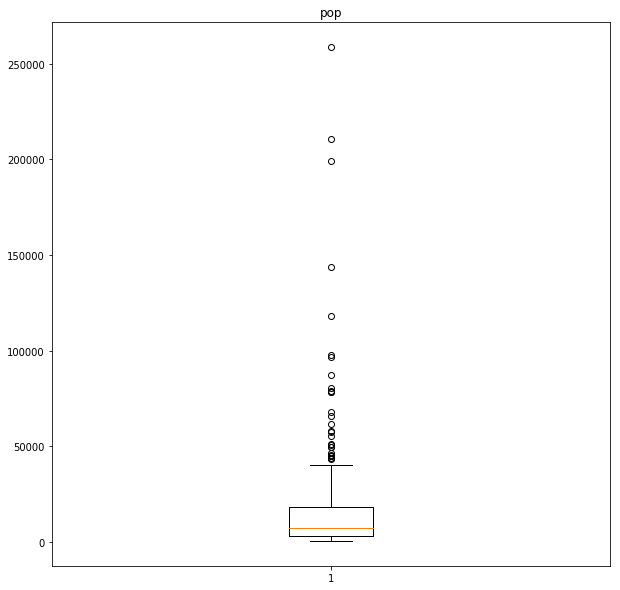

In [266]:
ave=df['Population'].mean()
most=df['Population'].max()
#print(most)

df.loc[df['Population'] == most]=ave


print(ave)
pop=df['Population']
sns.distplot(pop);
plt.figure(figsize=(10, 10))
plt.boxplot(pop)
plt.title('pop')

plt.show()

In [267]:
square=df['Population']**2
df['Population Squared']=square


In [268]:
count=0
rob=rob*1
for num in rob:
    if num > 0:
     rob[count]=1
    count +=1
df['rob']=rob

count=0
murder=murder*1
for num in murder:
    if num > 0:
     murder[count]=1
    count +=1
df['murder']=murder

count=0
murder=murder*1
for num in murder:
    if num > 0:
     murder[count]=1
    count +=1
df['murder']=murder
     
burg=df['Burglary']
count=0
burg=burg*1
for num in burg:
    if num > 0:
     burg[count]=1
    count +=1
df['burglary']=burg

In [269]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Population Squared,rob,murder,burglary
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,3.463321e+06,0,0,1.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,6.640929e+06,0,0,1.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,8.099716e+06,0,0,1.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN,9.595378e+09,1,1,1.0
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN,4.080654e+07,1,0,1.0


In [286]:
regr = linear_model.LinearRegression()
Y = df['Property crime'].values.reshape(-1, 1)
X = df[['Population','Population Squared','rob','murder']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[1.93452957e-02 6.91521071e-08 5.35094873e+01 9.86959371e+02]]

Intercept: 
 [-49.73158415]

R-squared:
0.20106015983663494


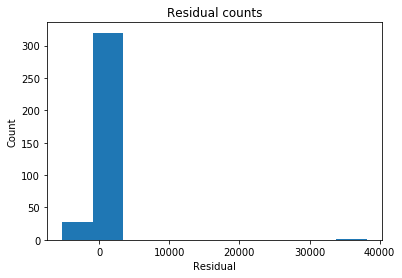

In [287]:
predicted = regr.predict(X).ravel()
actual = df['Property crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

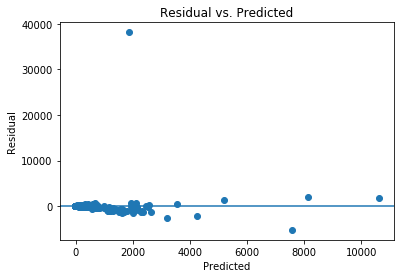

In [288]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [289]:
regr = linear_model.LinearRegression()
Y = df['Property crime'].values.reshape(-1, 1)
X = df[['Population','Population Squared','Robbery','Murder and nonnegligent manslaughter']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 2.00485444e-02 -8.25885379e-08  9.96587019e+00 -8.98195498e+00]]

Intercept: 
 [-25.36850543]

R-squared:
0.9863269016440173


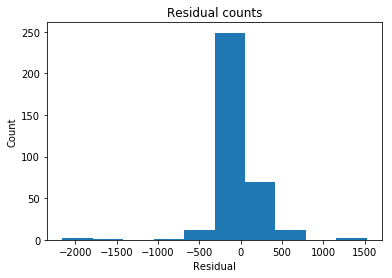

In [290]:
predicted = regr.predict(X).ravel()
actual = df['Property crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

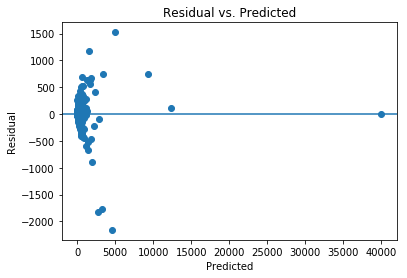

In [283]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()